## Hello

I am begginer in Machine Learning. This is my first Competition and Submission in Kaggle

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
result = pd.read_csv('data/test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.shape

(891, 12)

In [4]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
train.dropna(inplace = True)

In [6]:
# summarizing the data
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,455.366120,0.672131,1.191257,35.674426,0.464481,0.475410,78.682469
std,247.052476,0.470725,0.515187,15.643866,0.644159,0.754617,76.347843
min,2.000000,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,263.500000,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,457.000000,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,676.000000,1.000000,1.000000,47.500000,1.000000,1.000000,90.000000
max,890.000000,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


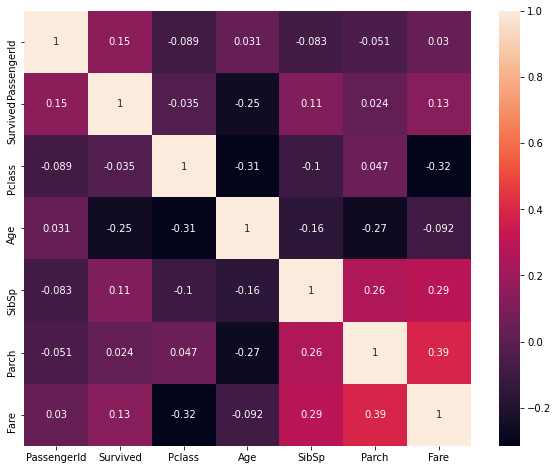

In [7]:
torr = train.corr()
plt.figure(figsize=(10,8))
sns.heatmap(torr,annot = True);

In [8]:
train.replace(('male', 'female'), (1, 0), inplace=True)
test.replace(('male', 'female'), (1, 0), inplace=True)

In [9]:
# Getting Features
features = ['Age', 'Sex', 'Pclass', 'SibSp', 'Parch', 'Embarked']
X = pd.get_dummies(train[features])

# Predicting value
y = train['Survived']

In [10]:
X.head()

,Age,Sex,Pclass,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S
1,38.0,0,1,1,0,1,0,0
3,35.0,0,1,1,0,0,0,1
6,54.0,1,1,0,0,0,0,1
10,4.0,0,3,1,1,0,0,1
11,58.0,0,1,0,0,0,0,1


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state=1)

In [12]:
lr = LogisticRegression()
lr.fit(X, y)

LogisticRegression()

In [13]:
y_pred = lr.predict(X_test)

In [14]:
metrics.confusion_matrix(y_test, y_pred)

array([[27, 17],
       [14, 71]], dtype=int64)

In [15]:
metrics.accuracy_score(y_test, y_pred)

0.7596899224806202

In [16]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.61      0.64        44
           1       0.81      0.84      0.82        85

    accuracy                           0.76       129
   macro avg       0.73      0.72      0.73       129
weighted avg       0.76      0.76      0.76       129



In [17]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [18]:
test.shape

(418, 11)

In [19]:
test.fillna(0, inplace=True)

In [20]:
test.shape

(418, 11)

In [21]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,0,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,0,S
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,0,Q
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,0,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,0,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",1,0.0,0,0,A.5. 3236,8.0500,0,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,0,S
416,1308,3,"Ware, Mr. Frederick",1,0.0,0,0,359309,8.0500,0,S


In [22]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [23]:
test_case = test[features]
test_case

,Age,Sex,Pclass,SibSp,Parch,Embarked
0,34.5,1,3,0,0,Q
1,47.0,0,3,1,0,S
2,62.0,1,2,0,0,Q
3,27.0,1,3,0,0,S
4,22.0,0,3,1,1,S
...,...,...,...,...,...,...
413,0.0,1,3,0,0,S
414,39.0,0,1,0,0,C
415,38.5,1,3,0,0,S
416,0.0,1,3,0,0,S


In [24]:
test_case = pd.get_dummies(test_case)

In [25]:
test_case.head()

,Age,Sex,Pclass,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S
0,34.5,1,3,0,0,0,1,0
1,47.0,0,3,1,0,0,0,1
2,62.0,1,2,0,0,0,1,0
3,27.0,1,3,0,0,0,0,1
4,22.0,0,3,1,1,0,0,1


In [26]:
test_case.shape

(418, 8)

In [27]:
pred = lr.predict(test_case)
pred.shape

(418,)

In [28]:
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': pred.astype(int)})
output

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,1
414,1306,1
415,1307,0
416,1308,1


In [29]:
output.to_csv('submission1.csv', index=False)